# Esercizio 11.2

Nel secondo punto dell'esercizio si ripropone il problema del primo punto ma con dei dati generati secondo il modello $f(x)=4-3x-2x^2+3x^3$ con $x \in [-1,1]$.
È richiesto di modificare anche il numero di layer, il numero di neuroni e aggiungere ottimizzatori, funzioni di perdita e ottimizzatori.

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [85]:
# target parameters of f(x) = m*x + b
m = 3 # slope
n = -2
o = -3
b = 4 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [86]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m*x_valid*x_valid*x_valid + n * x_valid*x_valid + o * x_valid + b # ideal (target) linear function

sigma = 1. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m*x_train*x_train*x_train + n * x_train*x_train + o * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m*x_valid*x_valid*x_valid + n * x_valid*x_valid + o * x_valid + b, sigma)

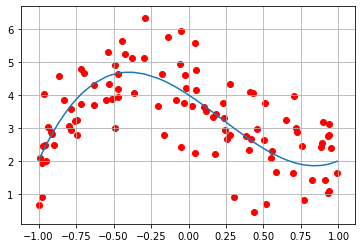

In [154]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [172]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(25,activation="elu"))
model.add(Dense(25,activation="selu"))
model.add(Dense(25,activation="relu"))
#model.add(Dense(10))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [173]:
# get a summary of our composed model
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_91 (Dense)             (None, 25)                50        
_________________________________________________________________
dense_92 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_93 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 26        
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [174]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 0s 6ms/step - loss: 4.0473 - mse: 4.0473 - val_loss: 1.3494 - val_mse: 1.3494
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 1.4061 - mse: 1.4061 - val_loss: 1.6180 - val_mse: 1.6180
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 1.3170 - mse: 1.3170 - val_loss: 1.7800 - val_mse: 1.7800
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 1.2399 - mse: 1.2399 - val_loss: 1.3038 - val_mse: 1.3038
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 1.1590 - mse: 1.1590 - val_loss: 0.9889 - val_mse: 0.9889
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 1.0987 - mse: 1.0987 - val_loss: 1.0497 - val_mse: 1.0497
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 1.0594 - mse: 1.0594 - val_loss: 0.8910 - val_mse: 0.8910
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 1.0473 - mse: 1.04

In [175]:
# return weights
model.get_weights()

[array([[1.507702]], dtype=float32),
 array([0.24162146], dtype=float32),
 array([[-0.22024107,  0.20452796, -0.33551928, -0.63691765, -0.02339071,
          0.20818841, -0.39925182, -0.2855567 , -0.47888607,  0.43638742,
          0.41192347,  0.32282192,  0.40644258,  0.31550127, -0.2902548 ,
          0.08098067,  0.25682172,  0.1739425 , -0.12324483, -0.58881664,
         -0.39804414, -0.1227081 ,  0.56640226,  0.18233311, -0.4159005 ]],
       dtype=float32),
 array([-0.10486057,  0.01735284,  0.09036686, -0.21041161, -0.05994134,
        -0.10487086, -0.20759203,  0.01084341,  0.17646687,  0.11542655,
         0.08039486,  0.13211377,  0.316916  , -0.25688025, -0.18765533,
         0.10645042, -0.00088126,  0.18751207, -0.02788671,  0.04300032,
         0.29117975,  0.25262153, -0.03456325,  0.2041711 , -0.15905926],
       dtype=float32),
 array([[-2.77010232e-01, -1.73329011e-01,  1.73942938e-01,
          2.86081731e-01, -5.38162254e-02,  3.19023639e-01,
          1.08004376e-

In [167]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 11.5600 - mse: 11.5600

Test loss: 11.560007095336914
Test accuracy: 11.560007095336914


In [168]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 10.7543 - mse: 10.7543

Test loss: 10.754271507263184
Test accuracy: 10.754271507263184


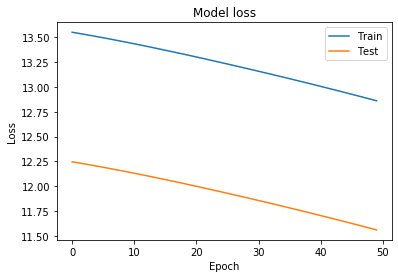

In [169]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

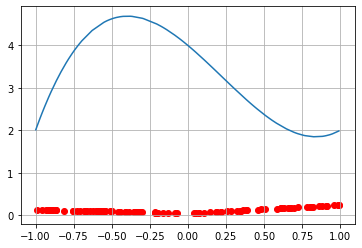

In [170]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

La prima prova è stata effettuata aumentando il numero di layer. Si hanno quindi due layer da un neurone ciascuno, tuttavia il risultato non va bene perché la rete è in grado di formulare un modello con troppi pochi parametri (il programma fitta la curva con una retta). Anche aggiungendo un layer con 10 neuroni e dopodiché provando ad aggiungere un ulteriore layer con 25 neuroni la situazione non cambia. 
Dunque si è provato ad aggiungere la funzione di attivazione "elu" al secondo layer con 25 neuroni e il modello previsto sembra iniziare a corrispondere al modello utilizzato. L'errore sul modello è:
Test loss = 1.10

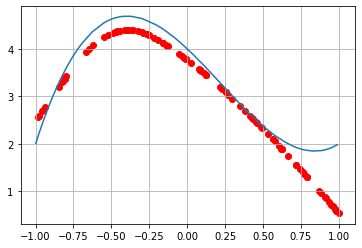

In [84]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Ora si prova a togliere il layer con 10 neuroni. Quindi abbiamo il primo layer con un neurone,il secondo con 25 neuroni e la funzione di attivazione elu e l'ultimo layer con un neurone singolo. Non si nota un cambiamento sostanziale rispetto ai risultati di prima. Il Test loss è di 0.94.

In [106]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Aggiungendo al secondo layer un numero alto di neuroni (1000) non si ottengono buoni risultati

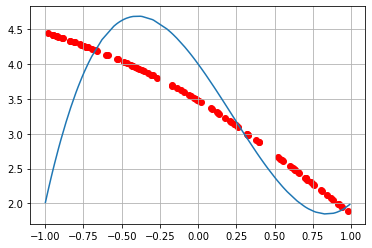

In [115]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Ora si prova a cambiare funzione di attivazione. Quindi abbiamo il primo layer con un neurone,il secondo con 25 neuroni e la funzione di attivazione selu e l'ultimo layer con un neurone singolo. Non si nota un cambiamento sostanziale rispetto ai risultati di prima. Il Test loss è di 0.95.

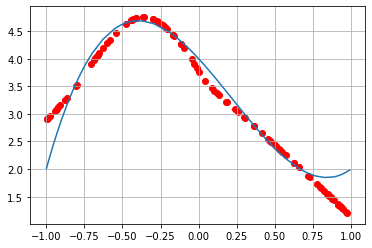

In [132]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Dopo vari tentativi il modello migliore è stato il seguente: un layer con un neurone, 3 layer ciascuno con una funzione di attivazione diversa: elu, selu e relu. 

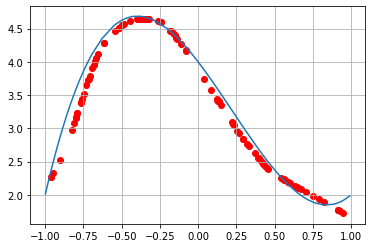

In [150]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Si è provato a cambiare l'ottimizzatore sgd con adagrad e adadelta ma i modelli risultano tutti sbagliati.